# Deep Learning and Constraint Satisfaction Problems


**_Author: Dhavide Aruliah_ and _Jacob Koehler_**

**_Reviewer: Jessica Cervi_**

**Expected time = 2.5 hours**

**Total points = 90 points**

    
## Assignment Overview


This assignment provides an opportunity to get used to *artificial neural networks* for supervised machine learning. We'll do this first by looking at the *perceptron* algorithm as an early example of a neural network. By building a simple program implementing the perceptron, you'll get a sense of the mathematical ideas underlying the training of neural networks. From there, you'll experiment with [Keras](https://keras.io/) as an example of a framework for building neural networks and solve a simple classification problem as well as a regression problem.

You will also solve a few *Constraint Satisfaction Problems* by backtracking (including the famous $N$-Queens problem).

The goals of the present assignment are to:
+ Get used to the core terminology used with neural networks: layers, units, activation functions, etc.
+ Implement the simplest neural network algorithm (the perceptron) to build a conceptual foundation on which neural networks are built.
+ Solve som simple problems using a neural networks framework.
+ Develop simple recursive functions for backtracking.

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Implement deep learning and contraints satisfaction problems in Python
- Implement the Percepetron algorithm in Python
- Adapt the Percepetron algorithm to a deep-learning version with multiple layers
- Use the `sklearn` `MLPClassifier`
- Use `Keras` as a framework to solve Neural Network problems
- Prepare and evaluate neural networks for regression
- Solve a constraint satisfaction problem in Python: the $N$-Queens problem



## Index: 

####  Deep Learning and Constraint Satisfaction Problems


- [Question 1](#q01)
- [Question 2](#q02)
- [Question 3](#q03)
- [Question 4](#q04)
- [Question 5](#q05)
- [Question 6](#q06)
- [Question 7](#q07)
- [Question 8](#q08)
- [Question 9](#q09)
- [Question 10](#q10)

## Deep Learning and Constraint Satisfaction Problems

## The Perceptron

To begin, you will replicate one of the first models of an artificial Neural Network that came from [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) in 1957. While working on research funded by the US Defense Department, Rosenblatt investigated a straightforward approach to developing a classification model. You will construct a basic implementation of the Perceptron from scratch before moving to the Keras library.

We will begin by importing the necesserary libraries.

In [1]:
# Standard boilerplate for Python for data science
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
from numpy.testing import assert_equal 
filterwarnings('ignore')

[Back to top](#Index:) 
<a id='q01'></a>


### Question 1:

*10 points*
    

Complete the function body in the code cell below to implement the hard threshold activation function `sign` with function signature `sign(t)` as given below.
+ Your function should follow the convention
  $$\mathrm{sign}(t) = \begin{cases} +1, & t\ge0 \\ -1, &t<0 \end{cases}$$
  for any real value $t\in\mathbb{R}$.
+ Make sure your function `sign` is [*vectorized*](https://docs.scipy.org/doc/numpy/glossary.html#term-vectorization) (i.e., is a [*universal function*](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) in the parlance of Numpy). That is, it should accept a Numpy array as an input and return a Numpy array of identical dimensions with entries $+1$ or $-1$ as required (i.e., the $\text{sign}$ function should be applied elementwise to the array).
+ Notice that `np.sign` won't work here (because `np.sign(0)==0` and you want `sign(0)==+1` instead).
+ The function `np.where` can be useful here.

In [2]:
def sign(x):
    return np.where(x >=0, +1,-1)

In [3]:
sign(np.array([-4, 3.5, 1.2, -5.6, 0, -2.1]))
#array([-1.,  1.,  1., -1.,  1., -1.])

array([-1,  1,  1, -1,  1, -1])

In [18]:
### GRADED

### YOUR SOLUTION HERE
def sign(t):
    """Returns +1 for t>=0, -1 otherwise
    >>> sign(np.array([-4, 3.5, 1.2, -5.6, 0, -2.1]))
    array([-1.,  1.,  1., -1.,  1., -1.])
    """
    return np.where(t >=0, +1,-1)
###
### YOUR CODE HERE
###


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q02'></a>


### Question 2:

*5 points*

Complete the function `f_perceptrion(X, w, b)` below. Your function should take three arguments, `X`, `W` and `b` and should compute the perceptron according to the formula

$$f_{\mathrm{perceptron}}(x) = \mathrm{sign}(W x^T +b),$$

where $x$ is a row vector (i.e., one-dimensional array) of length $d$, $W$ is a row vector of length $d$, and $b$ is a scalar.

+ You will make the function more flexible by allowing for $N\times d$ *feature matrices* $X$ as input. In that case, the function can be computed using the same formula as above. Note that now the output is a $1\times N$ vector rather than a $1\times 1$ scalar).


+ Tip: If the conventions around row & column vectors are messy, consider using `np.squeeze` to reduce two-dimensional row or column vectors to one-dimensional vectors. Numpy is very permissive about computing matrix-vector products using one-dimensional arrays.

+ Tip: You will need to use the function `sign` defined in Question 1.



In [20]:
def f_perceptron(X, W, b):
    z = (np.squeeze(W)@X.T) + b
    return sign(z)

In [21]:
X = np.array([[ 3,  5,  2, -5,  3],
                      [ 6,  2,  1,  8, -9],
                      [ 4, -6, -7,  6, -9]])
W, b = np.array([4,5,-2,0.2,1]), 1.5
f_perceptron(X, W, b)
#array([ 1.,  1., -1.])

array([ 1,  1, -1])

In [11]:
w = np.squeeze(W)
w

array([ 4. ,  5. , -2. ,  0.2,  1. ])

In [22]:
### GRADED

### YOUR SOLUTION HERE
def f_perceptron(X, W, b):
    '''Returns sign(W X^T + b)
    >>> X = np.array([[ 3,  5,  2, -5,  3],
                      [ 6,  2,  1,  8, -9],
                      [ 4, -6, -7,  6, -9]])
    >>> W, b = np.array([4,5,-2,0.2,1]), 1.5
    >>> f_perceptron(X, W, b)
    
    array([ 1.,  1., -1.])
    '''
    z = (np.squeeze(W)@X.T) + b
    return sign(z)
###
### YOUR CODE HERE
###


In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q03'></a>


### Question 3:

*10 points*


Your task now is to write a function `find_misclassified` that identifies points that are misclassified by the function `f_perceptron` from above.

+ The function takes four arguments:
  + $N\times d$ *feature matrix* `X`;
  + *weight vector* `W` of length $d$;
  + (scalar) *bias* `b`; and
  + target vector `y` of length $N$ with entries $+1$ or $-1$.
  The inputs `X`, `W`, and `b` are exactly as required for evaluating `f_perceptron`.
  
+ The output computed by the function `find_misclassified` is a one-dimensional Numpy array or a list of integers corresponding to rows of the input `X` that are misclassified by `f_perceptron` according to

  $$f_{\mathrm{perceptron}}(X_{k,:}, W, b) \neq y_{k},$$
  
  where $X_{k,:}$ refers to the $k$th row of the $N\times d$ matrix $X$.
+ The row indices output of the function `find_misclassified` should be sorted in increasing order.

In [32]:
def find_misclassified(X, y, W, b):
    pred = f_perceptron(X,W,b)
    misc = []
    for idx, y_hat in enumerate(pred):
        if y_hat != y[idx]:
            misc.append(idx)
            
    return np.array(misc)

In [33]:
W, b = np.array([-5,  5,  4, -3, -1, -8]), 0.47686675
X = np.array([[ -5, -11, -13, -16, -13,  -7],
              [ -1,  -7, -16,  13, -11,  11],
              [  8,   7,   6, -16, -17,   0],
               [  4,   6,  17,  14, -10,  -9],
              [  0,  -5, -11,  15,  13,   8],
              [ -5,  -2,   3,  10,   8,   8],
               [ 19, -18,   6, -14,  16, -13]])
y = np.array([ 1, -1,  1, -1,  1, -1,  1])
find_misclassified(X, y, W, b)
#array([3, 4, 6])

array([3, 4, 6])

In [34]:
### GRADED

### YOUR SOLUTION HERE
def find_misclassified(X, y, W, b):
    '''Returns 1D array of index values for which f_perceptron misclassifies rows of X
    >>> W, b = np.array([-5,  5,  4, -3, -1, -8]), 0.47686675
    >>> X = np.array([[ -5, -11, -13, -16, -13,  -7],
    >>>               [ -1,  -7, -16,  13, -11,  11],
    >>>               [  8,   7,   6, -16, -17,   0],
    >>>               [  4,   6,  17,  14, -10,  -9],
    >>>               [  0,  -5, -11,  15,  13,   8],
    >>>               [ -5,  -2,   3,  10,   8,   8],
    >>>               [ 19, -18,   6, -14,  16, -13]])
    >>> y = np.array([ 1, -1,  1, -1,  1, -1,  1])
    >>> find_misclassified(X, y, W, b)
    array([3, 4, 6])
    '''
    pred = f_perceptron(X,W,b)
    misc = []
    for idx, y_hat in enumerate(pred):
        if y_hat != y[idx]:
            misc.append(idx)
            
    return np.array(misc)
###
### YOUR CODE HERE
###


In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Building the actual Perceptron Iteration

Given training data $X$  and $y$ for a binary classification problem, you are now ready to implement the perceptron algorithm to determine a classifier with parameters $W$ and $b$. The basic steps are:

+ Fix a random seed for the iteration (optional, but useful for reproducibility)
+ Initialize $W$ and $b$ with some random values;
+ Repeat the following steps, until convergence (i.e., until $\mathcal{M}$ is empty or, optionally, if the number of iterations is too large).

  + Compute the set $\mathcal{M}$ of rows of $X$ misclassified by $f_{\mathrm{perceptron}}(\cdot , W, b)$
  + Draw a row index $k$ from $\mathcal{M}$ at random
  + Use the $k$th row of $X$ and the $k$th entry of the label vector $y$ to update $W$ and $b$:
  
    $$\begin{aligned} W &\leftarrow W + \eta y_{k} X_{k,:} \\ b &\leftarrow b + \eta y_{k} \end{aligned}$$
    (above $\eta$ is a user-specified *learning rate*).
    
Below, we define a function that carries out this iteration.

In [36]:
 
def perceptron_iteration(X, y, eta=1.0, ITMAX=1000, random_state=None):
    '''Applies the perceptron algorithm to compute weights W and bias b associated with a binary
    classification problem defined by N by d feature matrix X and N-vector y of labels.
    >>> W, b = np. array([-5,  5,  4, -3, -1, -8]), 0.47686675
    >>> X = np.array([[ -5, -11, -13, -16, -13,  -7],
    >>>               [ -1,  -7, -16,  13, -11,  11],
    >>>               [  8,   7,   6, -16, -17,   0],
    >>>               [  4,   6,  17,  14, -10,  -9],
    >>>               [  0,  -5, -11,  15,  13,   8],
    >>>               [ -5,  -2,   3,  10,   8,   8],
    >>>               [ 19, -18,   6, -14,  16, -13]])
    >>> y = np.array([ 1, -1,  1, -1,  1, -1,  1])
    >>> W, b = perceptron_iteration(X, y)
    >>> print(W)
    >>> print(b)
    Converged after 15 iterations
    [ 32.96891939   4.96204112 -18.91160225 -33.74141678  32.16552454  -7.59447954]
    [5.73103265]
    '''
    np.random.seed(seed=random_state) # DO NOT CHANGE THIS LINE
    N, d = X.shape
    W, b = np.random.randn(d), np.random.randn(1)
    # Determine misclassified rows of X
    M = find_misclassified(X, y, W, b)
    for iteration in range(ITMAX):
        if len(M):
            k = np.random.choice(M)
            # stochastic gradient descent updates:
            W, b = W + eta*y[k]*X[k,:], b + eta*y[k]
            # Determine misclassified rows of X with new W and b
            M = find_misclassified(X, y, W, b)
        else:
            break
    if iteration < ITMAX-1:
        print('Converged after {} iterations'.format(iteration))
        return W, b
    else:
        print('Failed to converge: {}'.format(iteration))



---
## Neural networks

After recognizing that the perceptron has two conceptual layers (an *input* layer and an *output* layer) that connect spaces of disparate dimensions, we can extend this model to more general functions. That is, we can build a *multi-layer perceptron* with multiple input layers, each associated with their own weight matrix, bias vector, and activation function. It is possible to use more general *network architectures* with these components to represent more sophisticated functions. When multiple hidden layers are used, the network is often considered as a \"deep\" neural network, hence the term *deep learning*

A key component of this is the choice of the *activation function*.

+ For binary classification problems, the logistic activation function
  $$ \sigma(t) = \frac{e^{t}}{1+e^t} $$
  
  (as seen from logisitc regression) is useful for probabilities of belonging to one of the two classes.
+ For multiclass classification problems, the $\text{softmax}$ function is often used to provide probabilities of belonging to any of a number of classes. It is a mapping $x \mapsto \mathrm{softmax}(x)$ of a vector of length $d$ to another vector of length $d$ defined by

  $$[\mathrm{softmax}(x)]_{k} :=\frac{\exp(x_k)}{\sum_{i=1}^{d} \exp(x_i)} \qquad(k=1,2,\dotsc,d).$$
  
  Notice that the non-negative entries of $\mathrm{softmax}(x)$ add up to $1$ so it is, in effect, a discrete probability mass function.
+ The *ReLU* ("rectified linear unit") function is a piecewise linear function defined by
  $$\mathrm{relu}(t) = \begin{cases} t, & t\ge0 \\ 0, &t<0 \end{cases}.$$
  The ReLU function is often used in between internal layers of a regression model.

[Back to top](#Index:) 
<a id='q04'></a>


### Question 4:

*5 points*

Complete the Python function `softmax` below that accepts a `NumPy` array as input and return a `NumPy` array of identical dimensions with appropriate real-valued entries required according to the formula:


  $$[\mathrm{softmax}(x)]_{k} = \frac{\exp(x_k - M)}{\sum_{i=1}^{d} \exp(x_i-M)}.$$
  

In [37]:
def softmax(x):
    max_ = max(x)
    exp_ = np.exp(x - max_)
    
    return exp_ / sum(exp_)

In [38]:
x = np.array([3,-2,5,1,0])
softmax(x)
#array([1.16537670e-01, 7.85224641e-04, 8.61103378e-01, 1.57716585e-02, 5.80206892e-03])

array([1.16537670e-01, 7.85224641e-04, 8.61103378e-01, 1.57716585e-02,
       5.80206892e-03])

In [39]:
### GRADED

### YOUR SOLUTION HERE
def softmax(x):
    '''Returns smoothed version of max. function
    >>> x = np.array([3,-2,5,1,0])
    >>> softmax(x)
    array([1.16537670e-01, 7.85224641e-04, 8.61103378e-01, 1.57716585e-02, 5.80206892e-03])
    '''
    max_ = max(x)
    exp_ = np.exp(x - max_)
    
    return exp_ / sum(exp_)
###
### YOUR CODE HERE
###


In [40]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q05'></a>


### Question 5:

*5 points*

You task here is to complete the *rectified linear unit* or "ReLU" function `relu()`

The function `relu` should should accept a `NumPy` array as perform a transformation according to the convention

  $$\mathrm{relu}(t) = \begin{cases} t, & t\ge0 \\ 0, &t<0 \end{cases}$$
  
  for any real value $t\in\mathbb{R}$.
  
**HINT:** The function `np.where` can be useful here.

In [41]:
def relu(t):
    return np.where(t >= 0, t, 0)

In [42]:
x = np.array([ 0.10496716,  0.39051915,  2.29579808, -0.22517898,  0.42348426,  0.59049302])
relu(x)
#array([0.10496716, 0.39051915, 2.29579808, 0.        , 0.42348426,       0.59049302])

array([0.10496716, 0.39051915, 2.29579808, 0.        , 0.42348426,
       0.59049302])

In [43]:
### GRADED

### YOUR SOLUTION HERE
def relu(t):
    '''Returns t for t>=0, zero otherwise
    >>> x = np.array([ 0.10496716,  0.39051915,  2.29579808, -0.22517898,  0.42348426,  0.59049302])
    
    array([0.10496716, 0.39051915, 2.29579808, 0.        , 0.42348426,       0.59049302])
    '''
    return np.where(t >= 0, t, 0)
###
### YOUR CODE HERE
###


In [44]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###



## MNIST Digit Classification with Neural Networks

In the next few exercises, you'll get a chance to solve the [MNIST handwritten digits classification problem](http://yann.lecun.com/exdb/mnist/) first using  Scikit-Learn, and then using [Keras](http://keras.io) (a framework for neural networks explicitly). 

The Keras package provides [utilities to work with numerous datasets](https://keras.io/datasets/), but we'll avoid those here (to limit needless network traffic). Instead, we've created a compressed Numpy file in the local `assets` folder that contains the relevant data. The next few lines extract the arrays `X_train`, `y_train`, `X_test`, and `y_test` from that file.

In [45]:
d_file = np.load('data/mnist.npz')
X_train_orig = d_file['X_train']
X_test_orig = d_file['X_test']
y_train_orig = d_file['y_train'].reshape(-1,1)
y_test_orig = d_file['y_test'].reshape(-1,1)

In [46]:
for arr in [X_train_orig, X_test_orig, y_train_orig, y_test_orig]:
    print(arr.shape, arr.nbytes)

(60000, 28, 28) 47040000
(10000, 28, 28) 7840000
(60000, 1) 60000
(10000, 1) 10000


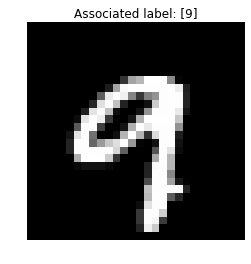

In [47]:
# Extract a single image
idx = 45621
digit_image = X_train_orig[idx]
plt.imshow(digit_image, cmap='gray')
plt.axis('off')
plt.title('Associated label: {}'.format(y_train_orig[idx]));

[Back to top](#Index:) 
<a id='q06'></a>


### Question 6:

*10 points*

Preprocess the features in the arrays `X_train_orig` & `X_test_orig` following the steps below:

+ Reshape the three-dimensional arrays into two-dimensional arrays by using the function `np.reshape`.
+ Rescale the integer values to be real values between 0 and 1 by dividing the arrays by 255.0 (the grayscale images have integer values between 0 & 255 by default).
+ Bind the rescaled and reshaped training and testing arrays to `X_train` & `X_test` respectively.

In [50]:
### GRADED

### YOUR SOLUTION HERE:
train_n, r, c = X_train_orig.shape
test_n, r, c = X_test_orig.shape
X_train = X_train_orig.reshape(train_n, r*c)/255
X_test  = X_test_orig.reshape(test_n, r*c)/255
###
### YOUR CODE HERE
###
### For verification:
print('X_train: {}'.format(X_train.shape))
print('X_test:  {}'.format(X_test.shape))

X_train: (60000, 784)
X_test:  (10000, 784)


In [51]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


For our next step, we need to preprocess the targets `y_train_orig` & `y_test_orig` by converting them to two-dimensional arrays with one-hot encoded rows (each corresponding to a particular categorical label).
+ We can use [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to do the encoding.

In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train_orig.reshape(-1,1))
y_train = encoder.transform(y_train_orig.reshape(-1,1))
y_test = encoder.transform(y_test_orig.reshape(-1,1))

### ScikitLearn `MLPClassifier`

Now that the data is loaded and ready to be processed, we can feed it into a simple feed-forward neural network.
ScikitLearn has a straightforward implementation of a *Multi-layered Perceptron* (see the documemtation for the [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) class).  Here, we have control over aforementioned parameters like the activation function and the learning rate.


Below we instantiate an `MLPClassifier`using the following parameters:

+ Set the argument `activation='logistic'` to choose a logistic activation function.
+ Use `hidden_layer_sizes=(512,)` to create a single hidden layer with 512 units.
+ Set the argument  `max_iter` parameter to `5` to limit the number of iterations (or *epochs*) of gradient descent.
+ Use `learning_rate='constant'` to keep the learning rate fixed and set `learning_rate_init` to `0.1`.

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(512,), max_iter=5, learning_rate='constant', learning_rate_init=0.1)

Having instantiated the `MLPClassifier`, you can fit it to the training data and assess the accuracy in the usual way with Scikit-Learn estimator `fit` and `predict` (or `score`) methods. Notice, however, that this is rather slow (about 25 seconds on a laptop with 16GB RAM).

**Note**: If you experience timeouts, you may want to leave the next cell commented out (and the one that follows).

In [54]:
%%time
# LEAVE THIS CELL COMMENTED OUT THIS CELL IF YOU EXPERINCE TIMEOUTS!
mlp.fit(X_train, y_train)   # Fitting to the training data is not so fast

Wall time: 32.4 s


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(512,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=5, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [55]:
%%time
# LEAVE THIS CELL COMMENTED OUT THIS CELL IF YOU EXPERINCE TIMEOUTS!
y_pred = mlp.predict(X_test)  # Prediction is much faster
# Prediction is must faster
accuracy_train = mlp.score(X_train, y_train)
accuracy_test = mlp.score(X_test, y_test)
print('Training accuracy: {:5.3f}'.format(accuracy_train))
print('Testing  accuracy: {:5.3f}'.format(accuracy_test))

Training accuracy: 0.825
Testing  accuracy: 0.830
Wall time: 1.33 s


## Introduction to Keras

<center>
    <a href="http://keras.io"><img src = "assets/keras.png" width = "50%" height = "50%" /></a>
</center>

Now that you have some familiarity the perceptron as a simple neural network and with the multi-layer perceptron in Scikit-Learn, you can use [Keras](http://keras.io) as a more practical framework to solve problems using neural networks. Keras is a library that provides a simple API for neural network algorithms on top of lower-level libraries like [Tensorflow](https://www.tensorflow.org/) or [Theano](https://github.com/Theano/Theano). Other high-level frameworks for neural networks ("deep learning") include [Chainer](https://chainer.org/) and [PyTorch](https://pytorch.org/).

We are now ready to instantiate a neural network model to solve the digits classification problem. This is referred to as specifying the *architecture* of the neural network.

+ To initialize the model, we instantiate an object of the class `models.Sequential` using the default options and we bind the object to the identifier "network" and add two layers:

    - 1) The first layer is a hidden layer using `network.add` with `layers.Dense` with the first argument to `layers.Dense` equal to `512` (for 512 units). Next, we use the keyword argument `activation='relu'` to specify the ReLU activation function for this layer.
    - 2) Finally, we add the final output layer using `network.add` & `layers.Dense`. This layer will have 10 units and `activation='softmax'` to specify the final output of the setup.

In [56]:
from keras import models
from keras import layers


ModuleNotFoundError: No module named 'keras'

## Using Keras for Linear Regression: Boston Housing data

Using Keras in a regression setting is very similar to doing so for classification examples.  We will work through a basic implementation using the Boston Housing dataset from Keras.

In [57]:
d_file = np.load('data/boston.npz')
train_data = d_file['train_data']
test_data = d_file['test_data']
train_targets = d_file['train_targets']
test_targets = d_file['test_targets']

To begin, we need to standardize our data.   Recall that the standard score of a sample $x$ is calculated as:

$$z = \frac{(x - \mu)}{  s}$$


where $\mu$ is the mean of the training samples or zero if and $s$ is the standard deviation of the training samples.

## Preprocessing the Housing Features


[Back to top](#Index:) 
<a id='q07'></a>


### Question 7:

*5 points*

Your task here is to *standardize* the features of the housing data using the transformation above.
+ Given the two-dimensional array of features in `train_data`, replace each column by subtracting its mean and dividing by its standard deviation.
+ Assign the results to `scaled_train` and `scaled_test`.
+ Be sure to use the means & standard deviations from the *training* data to standardize the *testing* data. That is, the standardizing transformation can only rely on information known *a propri* from training; it cannot know statistical properties of future testing instances.

In [59]:
### GRADED


### YOUR SOLUTION HERE:
mean_ = np.mean(train_data, axis=0)
std_ = np.std(train_data, axis=0)
scaled_train = (train_data - mean_)/std_
scaled_test = (test_data - mean_)/std_
###
### YOUR CODE HERE
###


In [60]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Preparing the Neural Network for Regression




Below, we have definied a function  `build_regression()`  that takes no arguments and returns a compiled Keras model using the following criteria:


- Uses a `Sequential` model.
- Contains two `Dense` layers with 32 units each and `relu` activation function.
- Contains a single `Dense` output layer with 1  unit.
- Compiles the network using the `compile()` function with the following parameters:
 - `optimizer = 'rmsprop'`
 - `loss = 'mse'`
 - `metrics = ['mae']`
 

In [ ]:

def build_regression():
    '''
    Builds a Keras Sequential model with
    two Dense layers containing 32 units and 
    a single linear output layer.
    '''
    model = models.Sequential()
    model.add(layers.Dense(32, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model


## Evaluating the Neural Network for Regression

[Back to top](#Index:) 
<a id='q08'></a>


### Question 8:

*10 points*


Just as we did with the classification example, we can assess the accuracy of the model using the testing data.

+ Prepare a model using the function `build_regression` from the previous question.
+ Use the arrays `scaled_train` and `train_targets` to train the model using the `fit` method. Provide the keyword arguments `epochs=10`, and `batch_size=128` to tailor the number of training epochs and the number of random observations drawn in each batch within an epoch.
+ Finally, use the `evaluate` method with the testing data `scaled_test` & `test_targets` as input. The output will be a sequence of two values: the loss and the accuracy.
+ Assign these two values to `test_loss` and `test_acc` respectively.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
model = build_regression()
model.fit(scaled_train, train_targets, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(scaled_test, test_targets)
###
### YOUR CODE HERE
###
print('test_loss: {:9.4g}'.format(test_loss))
print('test_acc:  {:9.4g}'.format(test_acc))

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


---
# Constraint Satisfaction Problems and Backtracking


In the final portion of this assignment, you'll explore a few [Constraint Satisfaction Problems](https://en.wikipedia.org/wiki/Constraint_satisfaction_problem). From Wikipedia:
> Constraint satisfaction problems (CSPs) are mathematical questions defined as a set of objects whose state must satisfy a number of constraints or limitations. CSPs represent the entities in a problem as a homogeneous collection of finite constraints over variables, which is solved by constraint satisfaction methods. CSPs are the subject of intense research in both artificial intelligence and operations research, since the regularity in their formulation provides a common basis to analyze and solve problems of many seemingly unrelated families. CSPs often exhibit high complexity, requiring a combination of heuristics and combinatorial search methods to be solved in a reasonable time. The Boolean satisfiability problem (SAT), the satisfiability modulo theories (SMT) and answer set programming (ASP) can be roughly thought of as certain forms of a constraint satisfaction problem.

We will start with the [eight queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle) or, more precisely, its generalization the $N$ queens puzzle.
Given an $N \times N$ chessboard, determine all the ways in which $N$ queens can be placed on the board so that no queen is threatened by another queen. Remember that queens can move an arbitrary number of spaces along horizontal rows, vertical columns, or diagonally connected squares on the chessboard. So, another way of stating the $N$ queens problem is to place $N$ queens on an $N\times N$ chessboard so that no two queens occupy the same row or column and so that no two queens lie along any diagonal line (i.e. at 45 degrees) of the board.

The $1$-Queens problem has a single, trivial solution. You can enumerate the cases for the $2$-Queens and $3$-Queens solutions to convince yourself that no solutions exist for these cases. For the $4$-Queens problem, here is one solution: 
<center>
    <img src = './assets/sol_4x4_b.png'>
</center>

To identify positions on the chess board, let the top left square be indexed by `(0,0)` with rows increasing downward and columns increasing to the right. For convenience sake, the positions of the $N$ queens on the board can be represented as a single list: the $k$th entry of the list represents the column location of the queen in row $k$.  For example, to represent the board above, use

```python
>>> board = [2, 0, 3, 1]
```

because the queens are positioned at coordinates `(0,2)`, `(1,0)`, `(2,3)`, & `(3,1)`.

In [61]:
#The board above and our representation
board = [2, 0, 3, 1]
print(board)

[2, 0, 3, 1]


To get started, you need to construct a function `is_nqueens_soln` to assess whether a given function is a valid solution of the $N$-Queens problem. Recall that an invalid board has two queens in the same row, the same column, or two queens on any diagonal line.

## Verifying a Valid *N*-Queens Chessboard

[Back to top](#Index:) 
<a id='q09'></a>


### Question 9:

*20 points*



The task here is to complete the function `is_nqueens_soln` that accepts a list of length $N$ as input (the representation of a board as described above).
+ Given the list `board` of length $N$ with entries between $0$ and $N-1$, the board is assumed to have a queen at position `(k, board[k])` for `k` $=0,1,\dotsc,N-1$.
+ The function returns `False` if any horizontal line, vertical line, or diagonal line on the $N\times N$ chessboard contains more than one queen.
+ If the entries of `board` are all between $0$ and $N-1$ and the preceding condition fails, the function should return `True`.

In [63]:
### GRADED

### YOUR SOLUTION HERE

def is_nqueens_soln(board):
    '''Returns True or False according to whether board is a valid solution of the
    N-Queens problem (assuming board is a list of N column coordinates only).
    INPUT:
       board: a list of length N with column positions of queens in each row.
              (note: board should be a permutation of integers 0 through N-1).
    OUTPUT:
       True or False according to whether board is a valid solution of the N-Queens
       problem.
    EXAMPLE:
    >>> B1 = [1, 3, 0, 2]
    >>> is_nqueens_soln(B1)
    True
    >>> B2 = [2, 0, 3, 3]
    >>> is_nqueens_soln(B2)
    False
    '''
    ##12.06.2020: Code took from: Week #20 - Office Hour with CL Carleton Smith
    ##Reference in recorded session: 01:00:58
    def is_attack(row, col, queens):
        return (col in queens) or (any(abs(row - r)==abs(col - c) for r,c in enumerate(queens)))
    
    pos = len(board)
    if pos < 2:
        return True
    
    for row in range(pos - 1, 0, -1):
        col = board[row]
        if is_attack(row, col, board[:row]):
            return False
        
    return True
###
### YOUR CODE HERE
###


In [64]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###



You now have the pieces ready to solve the $N$-Queens problem, i.e., to construct the set of all solutions of the $N$-Queens for $N\ge 4$.

You can approach the problem using a general algorithm for solving CSPs called [*backtracking*](https://en.wikipedia.org/wiki/Backtracking). From Wikipedia:

> Backtracking is a general algorithm for finding all (or some) solutions to some computational problems, notably constraint satisfaction problems, that incrementally builds candidates to the solutions, and abandons a candidate ("backtracks") as soon as it determines that the candidate cannot possibly be completed to a valid solution.


The strategy is to enumerate incrementally a set of partial candidates that, in principle, could be completed in various ways to yield all the possible solutions to the given problem. The partial candidates can be conceptually represented as the nodes of a tree structure, the potential search tree. The backtracking algorithm traverses this search tree recursively in a depth-first order. At each node, the algorithm checks for a valid solution. If the current node cannot be completed to a valid solution, the whole subtree rooted at the current node is pruned. Otherwise, the algorithm recursively enumerates all subtrees of from the current node.

In the current context, you start with an empty board and the number of queens $N$ to be placed on an $N\times N$ board.

## Determining a Flight Itinerary 

An example of a more useful problem one can solve using backtracking is the *flight itinerary problem*. In this problem, you are given a set of tuples of the form *(origin, destination)* where each ordinate in the tuple is an airport code. A starting airport is specifed, but the set of tuples is otherwise not provided in any particular sequence. The goal is to use the list of tuples (flights) provided to recover the sequence of airports visited in sequence making sure to exhaust every tuple in the set provided. Of course, this can be considered a graph teraversal problem where the nodes/vertices are the airports and the edges are the connecting flights.

For example, given the following set of flights
```
    ORD ➔ EWR
    YVR ➔ SFO
    SFO ➔ ORD
    YUL ➔ YVR

```

and the starting airport `YUL`, you should recover the sequence `YUL ➔ YVR ➔ SFO ➔ ORD ➔ EWR`. In Python, you'll represent the flights as tuples of strings and the final sequence as a single list of strings:
```python
>>> flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
>>> # Eventual itinerary to arrive at...
>>> itinerary = ['YUL', 'YVR', 'SFO', 'ORD', 'EWR']
```
Much like the approach to the $N$-Queens puzzle, you will start with a given itinerary, move through the list and test for valid connections.  If it is, we will continue down the list until we reach a terminal state.  If we reach an invalid move,  we will `.pop()` the move and continue on.  

[Back to top](#Index:) 
<a id='q10'></a>


### Question 10:

*10 points*

Your task here is to construct a function `get_itinerary` that returns a flight itinerary as described above from a sequence of connecting flights.
+ The function accepts two inputs: `flights`, a list of tuples of strings of the form `(origin, destination)` (airport codes) and `itinerary`, a list of strings (airport codes) as input.
+ The result returned should be a list of strings like `itinerary` describing a path that traverses all the nodes in `flights`.
+ If no such path exists, it should return the Python value `None`.

In [65]:
### GRADED

### YOUR SOLUTION HERE
def get_itinerary(flights, itinerary):
    '''Returns a list of airports (vertices) comprising a traversal of the edges
    listed in the input flights.
    INPUT:
      flight: list of tuples of the form (origin, destination) (i.e., airports)
      itinerary: list of destinations (airports)
    OUTPUT:
      list of airports traversing all edges in flights or None
    EXAMPLE:
    >>> flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
    >>> print(get_itinerary(flights, ['YUL']))
    ['YUL', 'YVR', 'SFO', 'ORD', 'EWR']
    >>> print(get_itinerary(flights, ['SFO']))
    None
    '''
###
### YOUR CODE HERE
###
    # If flights is empty, return itinerary (you're done)
    if not flights:
        return itinerary
    
    # Extract the previous stop from the itinerary
    previous_stop = itinerary[-1]
    # Loop over the list of flights:
    for idx, (origin, destination) in enumerate(flights):
        # Copy flights excluding current one to mark it as used
        copy_flights = flights[:idx] + flights[idx+1:]
        # Append the destination (second ordinate) from tuple to itinerary
        itinerary.append(destination)
        # When the origin (1st ordinate) matches the previous stop, return
        #    the result of a recursive call to get_itinerary using the current
        #    itinerary and the copy of flights that excludes the current one.)
        if origin == previous_stop:
            return get_itinerary(copy_flights, itinerary)
        # Pop the last entry from the itinerary
        itinerary.pop()
    # Return None if the loop terminates without returning
    return None


In [66]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
